In [1]:
from cmtj import Junction, Layer, CVector, Axis
import numpy as np 
import time 

In [2]:
dipoleTensor = [
    CVector(6.8353909454237e-4, 0., 0.),
    CVector(0., 0.00150694452305927, 0.),
    CVector(0., 0., 0.99780951638608)
]
demagTensor = [
    CVector(5.57049776248663e-4, 0., 0.),
    CVector(0., 0.00125355500286346, 0.),

    CVector(0., 0.0, -0.00181060482770131)
]

l1 = Layer(id="free", 
           mag=CVector(0., 0., 1.), 
           anis=CVector(0, 0., 1.), 
           K=900e3, 
           Ms=1200e3,
            J=-2.5e-6, 
            thickness=1.4e-9, 
            cellSurface=7e-10 * 7e-10, 
            demagTensor=demagTensor, 
            dipoleTensor=dipoleTensor,
            temperature=0.0)
l2 = Layer(id="bottom", 
           mag=CVector(0., 0., 1.), 
           anis=CVector(0, 0., 1.), 
           K=1500e3,
           Ms=1000e3, 
           J=-2.5e-6, 
              thickness=7e-9, 
              cellSurface=7e-10 * 7e-10, 
              demagTensor=demagTensor, 
              dipoleTensor=dipoleTensor,
              temperature=0)

junction = Junction([l1, l2], "testpy.csv", 100, 200)


In [10]:
from collections import defaultdict

data = defaultdict(list)
start = time.time()
TtoAm = 795774.715459
freq = 7e9
for field in np.linspace(0, 0.6, 30):
    junction.clearLog()

    junction.setConstantExternalField(field * TtoAm, Axis.xaxis)
    junction.setLayerCoupling("free", -3e-6)
    junction.setLayerCoupling("bottom", -3e-5)
    junction.setLayerIECUpdate("free", 1e-6, freq, 0)
    junction.setLayerIECUpdate("bottom", 1e-6, freq, 0)

    junction.runSimulation(20e-9, 1e-13, False, False)

    res = junction.calculateVoltageSpinDiode(freq, power=10e-6, minTime=10e-9)
    data['Rpp'].append(res['Rpp'])
    data['Vmix'].append(res['Vmix']*1e6)
    data['H'].append(field*1000)
end = time.time()
print(f"Simulation time: {end-start}")

Simulation time: 5.445374965667725


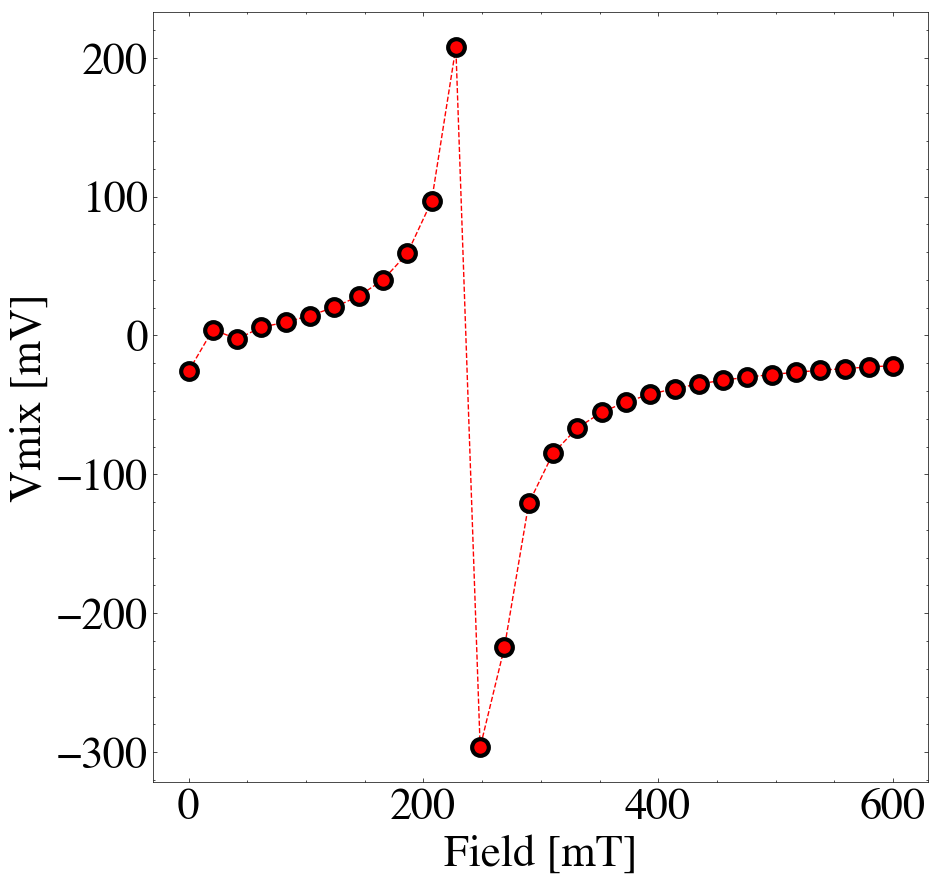

In [16]:
import matplotlib.pyplot as plt 
plt.style.use('default')
fsize= 32
plt.rcParams['figure.figsize'] = [14, 10]
plt.rc('font', family='serif', serif='Times', size=18)
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=fsize)
plt.rc('ytick', labelsize=fsize)
plt.rc('axes', labelsize=fsize)

plt.rc('mathtext',**{'default':'regular'})

with plt.style.context(['science', 'no-latex']):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(data['H'], data['Vmix'],
            'o--',
            color='red',
            markersize=12,
            markeredgecolor='k',
            markeredgewidth=3)
    ax.set_xlabel("Field [mT]")
    ax.set_ylabel("Vmix [mV]")